<a href="https://colab.research.google.com/github/jscortesg/Uniandes-MetodosComputacionales-2022-01/blob/main/Semana11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método Monte Carlo de Integración

Teorema del valor medio para una función $f(x)$:

\begin{align}
&I = \int_{a}^{b}dx\,f(x) = (b-a)\left<f\right> \\
&\left<f\right>: \text{valor medio de la función}
\end{align}

Por ejemplo, sea 

\begin{align}
&f(x) = \sin(x) \\
&a = 0,\,b = \pi\\
&\left<f\right> = \frac{1}{\pi - 0}\int_{0}^{\pi}dx\,\sin(x) = \left. -\frac{\cos(x)}{\pi}\right|_{0}^{\pi} = \frac{2}{\pi}.  \\
&\text{Entonces, }I = (\pi-0)*\frac{2}{\pi} = 2.
\end{align}


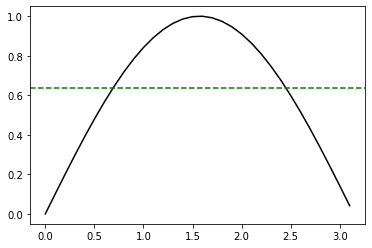

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.arange(0,np.pi,0.1)

plt.figure()
plt.plot(x, np.sin(x), color = 'black')
plt.axhline(2/np.pi, color = 'green', linestyle = '--')

**Monte Carlo:**

tomar $N$ números *aleatorios* $x_{i}\in [a,b]$ y reemplazar en

\begin{equation}
\left<f\right> \approx \frac{1}{N}\sum_{i=1}^{N}f(x_{i}).
\end{equation}

Entonces,

\begin{equation}
I \approx \frac{b-a}{N}\sum_{i=1}^{N}f(x_{i}).
\end{equation}

#Error en el método de integración Monte Carlo

Como es sabido,

\begin{equation}
I \approx \frac{b-a}{N}\sum_{i=1}^{N}f(x_{i}) = (b-a)\left<f\right>,\,x_{i}\in [a,b]
\end{equation}

Error asociado:

\begin{align}
&\Delta\left<f\right> = \sqrt{\frac{1}{N}\left(\left<f^{2}\right> - \left<f\right>^{2}\right)} \\
&\Delta\left<f\right> \propto \frac{1}{\sqrt{N}}
\end{align}


Volviendo a $f(x) = \sin(x)$,

In [ ]:
#Regla de Simpson

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


In [ ]:
#Monte Carlo

from scipy import random

xi = random.uniform(0, np.pi, 1000)

Intmc = ((b-a)/float(len(xi)))*sum(np.sin(xi))

Intmc

1.9656735980479292

In [ ]:
type(xi)

numpy.ndarray

Histograma del método Monte Carlo para la integral $\int_{0}^{\pi}\sin(x)\,dx$ (tomado de https://www.geeksforgeeks.org/monte-carlo-integration-in-python/)

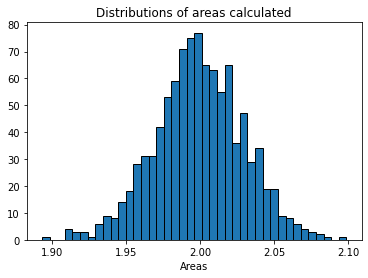

In [ ]:
# importing the modules
#from scipy import random
import numpy as np
import matplotlib.pyplot as plt

# limits of integration
a = 0
b = np.pi # gets the value of pi
N = 1000

# function to calculate the sin of a particular
# value of x
def f(x):
	return np.sin(x)

# list to store all the values for plotting
plt_vals = []

# we iterate through all the values to generate
# multiple results and show whose intensity is
# the most.
for i in range(N):
	
	#array of zeros of length N
	ar = np.zeros(N)

	# iterating over each Value of ar and filling it
	# with a random value between the limits a and b
	for i in range (len(ar)):
		ar[i] = random.uniform(a,b)

	# variable to store sum of the functions of different
	# values of x
	integral = 0.0

	# iterates and sums up values of different functions
	# of x
	for i in ar:
		integral += f(i)

	# we get the answer by the formula derived adobe
	ans = (b-a)/float(N)*integral

	# appends the solution to a list for plotting the graph
	plt_vals.append(ans)

# details of the plot to be generated
# sets the title of the plot
plt.title("Distributions of areas calculated")

# 3 parameters (array on which histogram needs
plt.hist(plt_vals, bins=40, ec="black")

# to be made, bins, separators colour between the
# beams)
# sets the label of the x-axis of the plot
plt.xlabel("Areas")
plt.show() # shows the plot


In [ ]:
max(plt_vals), min(plt_vals)

(2.098656915643877, 1.8933290019841473)

In [ ]:
#Valor promedio del método MC

ar_imc = np.array(plt_vals)

np.mean(ar_imc), np.std(ar_imc)

(1.9993482914298761, 0.02978218318124322)

Integrales de funciones muy oscilantes:

\begin{equation}
F_{1} = \int_{0}^{2\pi}\sin(100x)\,dx 
\end{equation}

In [ ]:
a = 0
b = 2*np.pi

nran = np.arange(2,21)

listaF1s = []

for n in nran:
  h = (b - a) / (n - 1)
  x = np.linspace(a, b, n)
  f1 = np.sin(100*x)
  listaF1s.append((h/3) * (f1[0] + 2*sum(f1[:n-2:2]) + 4*sum(f1[1:n-1:2]) + f1[n-1]))


In [ ]:
listaF1s

[8.228403866766253e-15,
 1.234260580014938e-14,
 2.418399152312318,
 -4.7183683232531273e-14,
 -8.701365858552278e-14,
 1.1902883131061888e-13,
 0.9585795541023713,
 1.1493837613197815e-13,
 0.3838666576974784,
 -8.289945665213964e-14,
 0.26178189538259833,
 5.951441565530944e-14,
 -0.5346801553443415,
 4.972492102265584e-15,
 -0.48367983046242524,
 2.6042751451797783e-14,
 -0.21372604108072704,
 5.856870704330008e-15,
 0.3394527857077101]

In [ ]:
listaF1mc = []

nran1 = np.arange(10,1000)

for n in nran1:
  hmc = (b - a)/n
  x = random.uniform(0, np.pi, n)
  f1 = np.sin(100*x)

  if abs(hmc*sum(f1)) < 1*pow(10,-3):
    listaF1mc.append((hmc*sum(f1),n))
  else:
    pass

In [ ]:
listaF1mc

[(-0.00028035481502081393, 506),
 (0.0009877866118507875, 707),
 (-0.0009057322183787373, 883)]

Ejemplo de función "peaked":

\begin{equation}
g(x,\sigma) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{x^{2}}{2\sigma}}
\end{equation}

$\sigma=0.01$:

\begin{equation}
\int_{-5}^{5}\frac{1}{\sqrt{2\pi*0.01}}e^{-\frac{x^{2}}{2*0.01}} = 1
\end{equation}

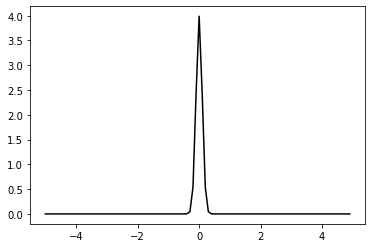

In [ ]:
xg = np.arange(-5,5,0.1)

def g(x,sig):
  return (1/np.sqrt(2*np.pi*sig))*np.exp(-(pow(x,2))/(2*sig))

plt.figure()
plt.plot(xg, g(xg,0.01), color = 'black')

In [ ]:
ag = -5
bg = 5

nrang = np.arange(2,41)

listags = []

for n in nrang:
  h = (bg - ag) / (n - 1)
  x = np.linspace(ag, bg, n)
  f1 = g(x,0.01)
  listags.append((h/3) * (f1[0] + 2*sum(f1[:n-2:2]) + 4*sum(f1[1:n-1:2]) + f1[n-1]))

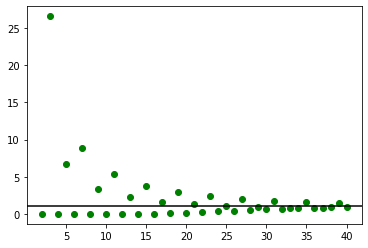

In [ ]:
plt.figure()
plt.scatter(nrang, listags, color='green')
plt.axhline(1, color = 'black')

In [ ]:
listagmc = []

nrang2 = np.arange(10,1000)

for n in nrang2:
  hmc = (bg - ag)/n
  x = random.uniform(ag, bg, n)
  f1 = g(x,0.01)

  listagmc.append(hmc*sum(f1))

In [ ]:
min(listagmc), max(listagmc)

(8.788067398966399e-26, 5.761252506390737)

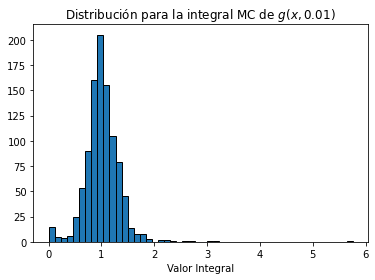

In [ ]:
plt.title("Distribución para la integral MC de $g(x,0.01)$")
plt.hist (listagmc, bins=50, ec="black")
plt.xlabel("Valor Integral")
plt.show()

Otro ejemplo de integral de función "peaked":

\begin{equation}
F_{2}(x) = \int_{0}^{2}\sin^{2}\left(\frac{1}{x(2-x)}\right)\,dx
\end{equation}

Función a integrar:

\begin{equation}
g_{1}(x) = \sin^{2}\left(\frac{1}{x(2-x)}\right)
\end{equation}

Resultado:

\begin{equation}
F_{2}(x) = 1.451
\end{equation}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sin
  after removing the cwd from sys.path.


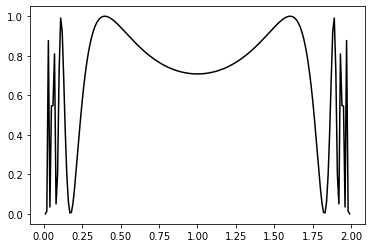

In [ ]:
xg1 = np.arange(0,2,0.01)

def g1(x):
  return pow(np.sin(1/(x*(2-x))),2)

plt.figure()
plt.plot(xg1, g1(xg1), color = 'black')

In [ ]:
ag1 = 0
bg1 = 2

nrang = np.arange(20,401)

listags1 = []

for n in nrang:
  h = (bg1 - ag1) / (n - 1)
  x = np.linspace(ag1, bg1, n)
  f1 = g1(x)
  listags1.append((h/3) * (f1[0] + 2*sum(f1[:n-2:2]) + 4*sum(f1[1:n-1:2]) + f1[n-1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sin
  after removing the cwd from sys.path.


In [ ]:
listags1

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [ ]:
listag1mc = []

nrang2 = np.arange(10,5000)

for n in nrang2:
  hmc = (bg1 - ag1)/n
  x = random.uniform(ag1, bg1, n)
  f1 = g1(x)

  listag1mc.append(hmc*sum(f1))

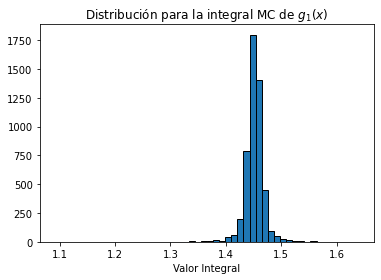

In [ ]:
plt.title("Distribución para la integral MC de $g_{1}(x)$")
plt.hist (listag1mc, bins=50, ec="black")
plt.xlabel("Valor Integral")
plt.show()

#Muestreo de importancia (*Importance Sampling*)

Promedio *pesado* para una función $g(x)$:

\begin{equation}
\left<g\right>_{w} = \frac{\int_{a}^{b}w(x)g(x)\,dx}{\int_{a}^{b}w(x)\,dx}
\end{equation}

$w(x)$: función **peso**. 

$g(x)$: función con una divergencia en $[a,b]$.

Integrales unidimensionales:

\begin{align}
I &= \int_{a}^{b}f(x)\,dx\\
g(x) &= \frac{f(x)}{w(x)} \\
\left<\frac{f(x)}{w(x)}\right> &= \frac{\int_{a}^{b}w(x)*f(x)/w(x)\,dx}{\int_{a}^{b}w(x)\,dx} = \frac{\int_{a}^{b}f(x)\,dx}{\int_{a}^{b}w(x)\,dx} \\
\left<\frac{f(x)}{w(x)}\right> &= \frac{I}{\int_{a}^{b}w(x)\,dx}\\
&\text{Entonces, }\\
I &= \left<\frac{f(x)}{w(x)}\right>\int_{a}^{b}w(x)\,dx
\end{align}

#Cálculo del promedio *pesado* $\left<\frac{f(x)}{w(x)}\right>$:

Densidad de probabilidad:

\begin{equation}
p(x) = \frac{w(x)}{\int_{a}^{b}w(x)\,dx}
\end{equation}

Para un punto $x_{i}$:

\begin{equation}
dP(x_{i}) = p(x_{i})dx_{i},\,x\in[x_{i},x_{i}+dx_{i}]
\end{equation}

Para $N$ puntos $x_{i}$ en $[a,b]$ con muestreo $g(x_{i})$:

\begin{equation}
\sum_{i=1}^{N}g(x_{i}) \approx \int_{a}^{b}Np(x)g(x)\,dx
\end{equation}

Valor promedio *pesado* de $g(x)$:

\begin{align}
\left<g\right>_{w} &= \frac{\int_{a}^{b}w(x)g(x)\,dx}{\int_{a}^{b}w(x)\,dx} \\
\int_{a}^{b}w(x)g(x)\,dx &= \int_{a}^{b}w(x')g(x')\,dx'\\
w(x') &= \left(\int_{a}^{b}w(x)\,dx\right)p(x') \\
\left<g\right>_{w} &= \frac{1}{\int_{a}^{b}w(x)\,dx}*\left[\int_{a}^{b}w(x)\,dx*\int_{a}^{b}p(x')w(x')\,dx'\right] \\
\left<g\right>_{w} &\approx \frac{1}{N}\sum_{i=1}^{N}g(x_{i})
\end{align}

Finalmente,

\begin{equation}
I \approx \frac{1}{N}\sum_{i=1}^{N}\frac{f(x_{i})}{w(x_{i})}\int_{a}^{b}w(x)\,dx
\end{equation}

$f(x)/w(x)$: **libre de divergencias**.



#Ejemplo:

\begin{equation}
I = \int_{0}^{1}\frac{x^{-1/2}}{e^{x}+1}\,dx
\end{equation}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  """


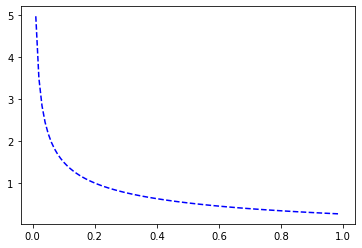

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f2(x):
  return pow(np.sqrt(x),-1)/(np.exp(x)+1)

xint = np.arange(0,1,0.01)

plt.figure()
plt.plot(xint, f2(xint), 'b--')

Resolver por un método de integración estándar (Simpson, trapecio, etc).

Valor teórico: $I\approx 0.84$

In [ ]:
a_1 = 0.0
b_1 = 1

#nrang_1 = np.arange(20,101)

#listafs_1 = []

#for n in nrang_1:
n = 31
h = (b_1 - a_1) / (n - 1)
x = np.linspace(a_1, b_1, n)
f = f2(x)
Int1_MC = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in reciprocal
  """


In [ ]:
Int1_MC

inf

In [ ]:
from scipy import random

listaf_mc = []

nrang_2 = np.arange(10,2000)

for n in nrang_2:
  hmc = (b_1 - a_1)/n
  x = random.uniform(a_1, b_1, n)
  f1 = f2(x)

  listaf_mc.append(hmc*sum(f1))

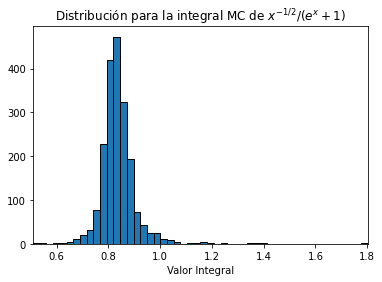

In [ ]:
plt.title("Distribución para la integral MC de $x^{-1/2}/(e^{x}+1)$")
plt.hist (listaf_mc, bins=50, ec="black")
plt.xlabel("Valor Integral")
plt.xlim(min(listaf_mc),max(listaf_mc))
plt.show()

In [ ]:
np.array(listaf_mc).mean()

0.83630177916556

In [ ]:
n = 31
h = (b_1 - (a_1+0.01)) / (n - 1)
x = np.linspace(a_1+0.01, b_1, n)
f = pow(np.sqrt(x),-1)

I_simp_1 = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp_1 = 2 - I_simp_1

print(I_simp_1)
print(err_simp_1)

2.030805064956802
-0.03080506495680213


In [ ]:
x2g1 = random.uniform(a_1, b_1, 1500)
x2g2 = random.uniform(a_1, b_1, 5000)

def g(x):
  return pow(np.sqrt(x),-1)

def f2g(x):
  return f2(x)/g(x)

def intg():
  return ((b_1 - a_1)/float(len(x2g1)))*sum(pow(np.sqrt(x2g1),-1))

I_g = (intg()*sum(f2g(x2g2)))/float(len(x2g2))

print(I_g)
print(intg())
print(I_g - 0.84)

0.7757429462509462
2.035503702931109
-0.06425705374905377


In [ ]:
listaf_mc2 = []

nrang_2 = np.arange(1000,6000)

for n in nrang_2:
  x = random.uniform(a_1, b_1, n)
  f1 = f2g(x)

  def gint():
    return ((b_1 - a_1)/float(len(x2g1)))*sum(pow(np.sqrt(x2g1),-1))

  listaf_mc2.append((sum(f1)*gint())/float(len(x)))

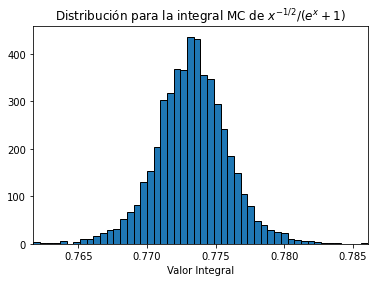

In [ ]:
plt.title("Distribución para la integral MC de $x^{-1/2}/(e^{x}+1)$")
plt.hist (listaf_mc2, bins=50, ec="black")
plt.xlabel("Valor Integral")
plt.xlim(min(listaf_mc2), max(listaf_mc2))
plt.show()

In [ ]:
min(listaf_mc2), max(listaf_mc2)

(0.7616915665776185, 0.7860995626305802)

In [ ]:
np.array(listaf_mc2).mean() - 0.84

-0.0667277775448124

In [ ]:
(abs(np.array(listaf_mc2).mean() - 0.84))*(100/0.84)

7.943783041049096

#Integración en varias dimensiones

\begin{align}
&\text{1 D: } &\int dx \propto h\sum_{i=1}^{N} \\
&\text{2 D: } &\int d^2x \propto h_{1}\sum_{i=1}^{N}*h_{2}\sum_{j=1}^{N} \\
&\text{3 D: } &\int d^3x \propto h_{1}\sum_{i=1}^{N}*h_{2}\sum_{j=1}^{N}*h_{3}\sum_{k=1}^{N} \\
&\text{n D: } &\int d^3x \propto h_{1}\sum_{i_{1}=1}^{N}*h_{2}\sum_{i_{2}=1}^{N}*\cdots *h_{n}\sum_{i_{n}=1}^{N} \\
\end{align}

Si $N=100$, 

\begin{align}
&\text{1 D: 100 puntos}\\
&\text{2 D: 100}^{2}\text{ puntos} \\
&\text{3 D: 100}^{3}\text{ puntos} \\
&\text{n D: 100}^{n}\text{ puntos}
\end{align}

En 2D:

\begin{align}
&\int_{a}^{b}dx\int_{c}^{d}dy\,f(x,y) \approx \frac{(d-c)(b-a)}{N}\sum_{i}f(\vec{x}_{i}) \\
&\vec{x}_{i} \in [a,b]\times[c,d]
\end{align}

En n D:

\begin{align}
&\int_{\mathcal{R}}d^{n}x\,f(\vec{x}) \approx \frac{V^{n}}{N}\sum_{i}f(\vec{x}_{i}) \\
&V^{N}: \text{ hipervolumen en n dimensiones} \\
&\vec{x}_{i} \in \mathcal{R},\,\text{dim}\left\{\mathcal{R}\right\} = n.
\end{align}

Por ejemplo, $V^{n=3}:$ volumen en 3D.



#Ejemplo:

Integral de la función

\begin{equation}
f(\vec{x}) = 10 - \vec{x}^{2}
\end{equation}

para $\vec{x}\in \mathbb{R}^{2}\text{ o }\mathbb{R}^{3}$ en la región $-2\leq x\leq{2},\,-2\leq y\leq 2$ ($-2\leq z\leq 2$).

Como es sabido,

\begin{align}
&\vec{x}^{2} = \sum_{i=1}^{n}x_{i}^{2} \\
&\text{2 D: }\vec{x}^{2} = x^{2} + y^{2} \\
&\text{3 D: }\vec{x}^{2} = x^{2} + y^{2} + z^{2}
\end{align}

Tomado de https://boyangzhao.github.io/posts/monte-carlo-integration

In [ ]:
def func1(x):
    # function f(x)= 10 + sum_i(-x_i^2)
    # for 2D: f(x)= 10 - x1^2 - x2^2
    return 10 + np.sum(-1*np.power(x, 2), axis=1)
  
def mc_integrate(func, a, b, dim, n = 1000):
    # Monte Carlo integration of given function over domain from a to b (for each parameter)
    # dim: dimensions of function
    
    x_list = np.random.uniform(a, b, (n, dim))
    y = func(x_list)
    
    y_mean =  y.sum()/len(y)
    domain = np.power(b-a, dim)
    
    integ = domain * y_mean
    
    return integ

# Examples
print("For f(x)= 10 - x\u00b2 - y\u00b2, integrated from -2 to 2 (for all x's)")
print(f"Monte Carlo solution for : {mc_integrate(func1, -2, 2, 2, 1000000): .3f}")
print(f"Analytical solution: 117.333")

print("For f(x)= 10 - x\u00b2 - y\u00b2 - z\u00b2, integrated from -2 to 2 (for all x's)")
print(f"Monte Carlo solution: {mc_integrate(func1, -2, 2, 3, 1000000): .3f}")
print(f"Analytical solution: 384.000")

For f(x)= 10 - x² - y², integrated from -2 to 2 (for all x's)
Monte Carlo solution for :  117.304
Analytical solution: 117.333
For f(x)= 10 - x² - y² - z², integrated from -2 to 2 (for all x's)
Monte Carlo solution:  383.787
Analytical solution: 384.000


Integral de la función 

\begin{equation}
f(\vec{x}) = 10 - \vec{x}^{2}
\end{equation}

en el interior del círculo unitario, es decir,

\begin{equation}
x^{2} + y^{2}\leq 1
\end{equation}

In [ ]:
def func1(x):
    # function f(x)= 10 + sum_i(-x_i^2)
    # for 2D: f(x)= 10 - x1^2 - x2^2
    return 10 + np.sum(-1*np.power(x, 2), axis=1)

def domain_unit_circle(x):
    # integration domain: sum of x^2 <= 1. 
    # For 2d, it's a unit circle; for 3d it's a unit sphere, etc
    # returns True for inside domain, False for outside
    
    return np.power(x,2).sum() <= 1

def mc_integrate(func, func_domain, a, b, dim, n = 1000):
    # Monte Carlo integration of given function over domain specified by func_domain
    # dim: dimensions of function
    
    # sample x
    x_list = np.random.uniform(a, b, (n, dim))
    
    # determine whether sampled x is inside or outside of domain and calculate its volume
    inside_domain = [func_domain(x) for x in x_list]
    frac_in_domain = sum(inside_domain)/len(inside_domain)
    domain = np.power(b-a, dim) * frac_in_domain
    
    # calculate expected value of func inside domain
    y = func(x_list)
    y_mean = y[inside_domain].sum()/len(y[inside_domain])
    
    # estimated integration
    integ = domain * y_mean
    
    return integ,frac_in_domain,sum(inside_domain),len(inside_domain)

print("For f(x)= 10 - x\u00b2 - y\u00b2, integrated over unit circle")
print(f"Monte Carlo solution: {mc_integrate(func1, domain_unit_circle, -2, 2, 2, 1000000)[0]: .3f}")
print(f"Analytical solution: 29.845")

For f(x)= 10 - x² - y², integrated over unit circle
Monte Carlo solution:  29.865
Analytical solution: 29.845


In [ ]:
mc_integrate(func1, domain_unit_circle, -2, 2, 2, 1000000)[1:]

(0.196685, 196685, 1000000)